# Efficient Frontier

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

In [3]:
#Import Data
AMZNdf = pd.read_csv("C:\\Users\\CSLO\\Documents\\New folder\\Datasets\\AMZN.csv", usecols=(0,5))
DISdf = pd.read_csv("C:\\Users\\CSLO\\Documents\\New folder\\Datasets\\DIS.csv", usecols=(0,5))
GEdf = pd.read_csv("C:\\Users\\CSLO\\Documents\\New folder\\Datasets\\GE.csv", usecols=(0,5))
JPMdf = pd.read_csv("C:\\Users\\CSLO\\Documents\\New folder\\Datasets\\JPM.csv", usecols=(0,5))
AALdf = pd.read_csv("C:\\Users\\CSLO\\Documents\\New folder\\Datasets\\AAL.csv", usecols=(0,5))

In [4]:
#Merge Datasets: Pd.merge only accepts merging two datasets at a time and has a problem with suffixes past three merges. 
#Hence, we have to improvise
df=pd.merge(AMZNdf, DISdf, on="Date", how='left')
df=pd.merge(df,GEdf, on="Date", how='left')
df.columns=['Date', 'AMZN', 'DIS', 'GE']
df=pd.merge(df, JPMdf, on="Date", how='left')
df=pd.merge(df, AALdf, on='Date', how='left')
df.columns=['Date', 'AMZN', 'DIS', 'GE', 'JPM', 'AAL']
print(df)

            Date       AMZN        DIS         GE         JPM        AAL
0     2010-01-04   6.695000  27.715311  54.076012   29.335226   4.496876
1     2010-01-05   6.734500  27.646177  54.356010   29.903456   5.005957
2     2010-01-06   6.612500  27.499256  54.076012   30.067751   4.798554
3     2010-01-07   6.500000  27.507906  56.876057   30.663364   4.939965
4     2010-01-08   6.676000  27.551113  58.101086   30.588057   4.845691
...          ...        ...        ...        ...         ...        ...
3267  2022-12-23  85.250000  87.321243  50.627350  125.269852  12.710000
3268  2022-12-27  83.040001  85.694084  51.277283  125.708794  12.530000
3269  2022-12-28  81.820000  83.511292  50.738758  126.395851  12.320000
3270  2022-12-29  84.180000  86.497742  51.840561  127.121033  12.700000
3271  2022-12-30  84.000000  86.200081  51.865330  127.960770  12.720000

[3272 rows x 6 columns]


In [5]:
#Set Index
df.set_index('Date', inplace=True)
df

,AMZN,DIS,GE,JPM,AAL
Date,,,,,
2010-01-04,6.695000,27.715311,54.076012,29.335226,4.496876
2010-01-05,6.734500,27.646177,54.356010,29.903456,5.005957
2010-01-06,6.612500,27.499256,54.076012,30.067751,4.798554
2010-01-07,6.500000,27.507906,56.876057,30.663364,4.939965
2010-01-08,6.676000,27.551113,58.101086,30.588057,4.845691
...,...,...,...,...,...
2022-12-23,85.250000,87.321243,50.627350,125.269852,12.710000
2022-12-27,83.040001,85.694084,51.277283,125.708794,12.530000
2022-12-28,81.820000,83.511292,50.738758,126.395851,12.320000


In [6]:
#Calculate Returns
returns=df.astype(float).pct_change()[1:]
returns
ar=((1+returns).prod())**(252/len(returns))-1
ar=ar*100
print("The annualised returns of different stocks is: {0}".format(ar))

The annualised returns of different stocks is: AMZN    21.515416
DIS      9.135164
GE      -0.321052
JPM     12.016485
AAL      8.340224
dtype: float64


In [7]:
#Volatility
v=returns.std()*np.sqrt(252)*100
print("The annualised volatility of different stocks is: {0}".format(v))

The annualised volatility of different stocks is: AMZN    33.031645
DIS     26.071317
GE      31.940351
JPM     28.531329
AAL     53.048082
dtype: float64


In [8]:
#Calculate Portfolio Return and Annualise it
#Portfolio Return= w1(u1) + w2(u2)...w5(u5) 

#Assuming Equal Weights Across All Assets

weights =[0.2,0.2,0.2,0.2,0.2]

#Define Function to Get Portfolio Return

def portfolioreturn(weights):
    return np.dot((returns.mean()+1)**252-1, weights)
portfolioreturn(weights)

0.1743080225584806

In [9]:
#Define Covar Matrix
returns.cov()

,AMZN,DIS,GE,JPM,AAL
AMZN,0.000433,0.000138,0.000114,0.000122,0.000172
DIS,0.000138,0.000270,0.000162,0.000173,0.000234
GE,0.000114,0.000162,0.000405,0.000213,0.000287
JPM,0.000122,0.000173,0.000213,0.000323,0.000281
AAL,0.000172,0.000234,0.000287,0.000281,0.001117


In [10]:
#Get Portfolio Variance, Standard Deviation, and Annualised Volatility

Volatility is the std dev of stock returns.

Portfolio Variance for a 5 Asset Portfolio is defined by the Formula
σ²(port) = w1²σ1² + w2²σ2² + w3²σ3² + w3²σ3² + w5²σ5²*2w1w2σ1σ2ρ(1,2) + 2w1w3σ1σ3ρ(1,3) + 2w1w4σ1σ4ρ(1,4) + 2w1w5σ1σ5ρ(1,5)*2w2w3σ2σ3ρ(2,3) + 2w2w4σ2σ4ρ(2,4) + 2w2w5σ2σ5ρ(2,5)*2w3w4σ3σ4ρ(3,4) + 2w3w5σ3σ5ρ(3,5)*2w4w5σ4σ5ρ(4,5)

The standard deviation is the sqrt of this variance

The annualised volatility is obtained by multiplying the standard deviation with the sqrt of 252 to represents the number of trading days in a year

In [11]:
#Function to Get Annualised Volatility
def annualisedportfoliovol(weights):
    return (np.dot(np.dot(returns.cov(), weights), weights))**(1/2)*np.sqrt(252)
annualisedportfoliovol(weights)

0.25276821127940535

In [12]:
#Create Random Weight Generator Function to Apply in Multiple Random Portfolios

def randomweightgen (returns):
    rand = np.random.random(len(df.columns))
    rand/=rand.sum()
    return rand
randomweightgen(returns)

array([0.02938461, 0.3130558 , 0.21913528, 0.12182646, 0.31659786])

In [13]:
#Define Empty List
p_returns = []
p_weight = []
p_volatility = []
risk_free_rate = 0.03
results = []

num_portfolios = 2000


In [14]:
#Portfolio Generation
for i in range(2000):
    weights=randomweightgen (returns)
    p_returns.append(portfolioreturn(weights))
    p_volatility.append(annualisedportfoliovol(weights))
    p_weight.append(weights)

In [15]:
data ={'Returns':p_returns, 'Volatility':p_volatility}

In [16]:
for counter, symbol in enumerate (returns.columns. tolist()):
    #print (counter, symbol)
    data[symbol+"weight"]=[weights[counter] for weights in p_weight]
portfolios = pd.DataFrame(data)
portfolios

,Returns,Volatility,AMZNweight,DISweight,GEweight,JPMweight,AALweight
0,0.175393,0.231417,0.262605,0.415391,0.103920,0.139688,0.078395
1,0.166481,0.234628,0.224113,0.233793,0.209522,0.239076,0.093496
2,0.164782,0.290923,0.060542,0.265734,0.213575,0.120953,0.339196
3,0.174137,0.236889,0.213961,0.262026,0.140758,0.266412,0.116842
4,0.196295,0.258423,0.216301,0.186547,0.048893,0.324976,0.223283
...,...,...,...,...,...,...,...
1995,0.184236,0.271868,0.156964,0.172310,0.133640,0.258437,0.278649
1996,0.176110,0.245684,0.258058,0.017307,0.237113,0.383840,0.103682
1997,0.179881,0.263390,0.126038,0.288306,0.082297,0.256204,0.247155
1998,0.252738,0.307076,0.528494,0.092417,0.002571,0.009584,0.366934


<Figure size 1000x700 with 0 Axes>

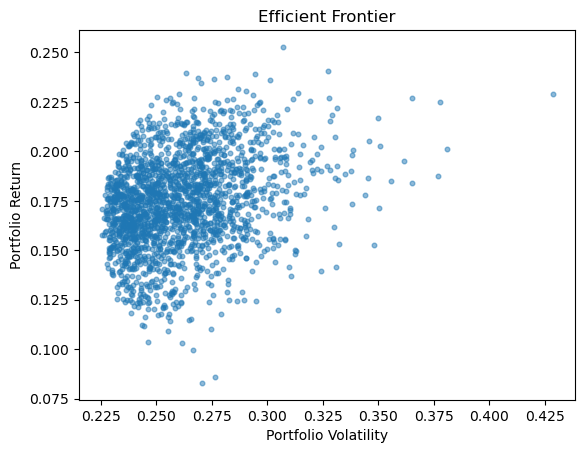

<Figure size 1000x700 with 0 Axes>

In [18]:
#Plot Efficient Frontier
plt.scatter(p_volatility, p_returns, marker='o', s=11, alpha=0.5)
plt.title("Efficient Frontier")
plt.ylabel("Portfolio Return")
plt.xlabel("Portfolio Volatility")
plt.figure(figsize=(10, 7))

The Maximum Sharpe Ratio Portfolio is the portfolio that gives the highest value of the Sharpe Ratio.
The Sharpe Ratio is given by the formula:
Sharpe Ratio = (Rx – Rf) / StdDev Rx
Where: Rx = Expected portfolio return. Rf = Risk-free rate of return. StdDev Rx = Standard deviation of portfolio return (or, volatility)

In [19]:
#Specify Risk Free Rate
rfr=0.03

In [20]:
max_sharpe_ratio_portfolio=portfolios.iloc[((portfolios['Returns']-rfr)/portfolios['Volatility']).idxmax()]
max_sharpe_ratio_portfolio

Returns       0.239475
Volatility    0.263477
AMZNweight    0.632382
DISweight     0.080064
GEweight      0.031606
JPMweight     0.178454
AALweight     0.077494
Name: 500, dtype: float64